# Práctica 2 parte 1

## Parámetros bellman ford

In [4]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt

def bf_negative_cycle(graph, node_ini=None, distance_ini=np.inf):
    """
    Description
    -------
    Get the shortest path using the Bellman-Ford algorithm.
    Parameters
    -------
    G : Networkx DiGraph. The input graph.
    node_ini : Optional parameter, indicate begining node
    distance_ini : Deafault value is inf
    Returns
    -------
    list
        A list with the shortest path.
    """
    
    if node_ini is None:
        n_nodes = len(graph.nodes())
    else:
        n_nodes = node_ini
            
    n = len(graph.nodes()) + 1
    # Remove nan borders inside graph
    edges = []
    for edge in graph.edges().data():
        if ~np.isnan(edge[2]['weight']):
            edges.append(edge)

    # Add a start node and add zero weighted edges to all other nodes
    for i in range(n-1):
        edges.append((n-1, i, {'weight': 0}))

    # Initialize distances of nodes and predecessors
    distance= np.ones(n) * distance_ini # Starting distances with infinite values
    distance[n_nodes] = 0  # Starting node has zero distance
    predecessors = np.ones(n) * -1  # Starting predecessors with -1 values
    
    list_val=[]

    for i in range(n):  
        x = -1
        for edge in edges:
            if distance[int(edge[0])] + edge[2]['weight'] < distance[int(edge[1])]:                
                a = [distance[int(edge[0])] + edge[2]['weight'], distance[int(edge[1])],predecessors[int(edge[1])],int(edge[1])]
                list_val.append(a)
                distance[int(edge[1])] = distance[int(edge[0])] + edge[2]['weight']
                predecessors[int(edge[1])] = int(edge[0])
                x = int(edge[1])
        if x == -1:  # If relaxation is not possible, there is no negative cycle
            return None
        
    # Identify negative cycle
    for i in range(n):
        x = predecessors[int(x)]
    cycle = []
    v = x
    while True:
        cycle.append(int(v))
        if v == x and len(cycle) > 1:
            break
        v = predecessors[int(v)]
    
    cycle.reverse() # reverse list
    return cycle, list_val, predecessors

Parámetros encontrados:

- 1. Grafo dirigido
- 2. Número de vértices
- 3. Distancia o costo en los bordes del gráfico
- 4. Vertice inicial
- 5. Pasos de relajación
- 5. Mapa de predecesores que contiene los nodos del mínimo spanning tree.
- 6. Distancia mínima

Inicializando ejemplos de redes a analizar:

In [18]:
# 4 nodos - 4 bordes
edges1 = [["0","1", 3],
         ["1","2", -2],
         ["2","1", -3],
         ["1","3", 4]]


"""edges1 = [["0","1", 3],
         ["0","3", 6],
         ["1","2", 0],
         ["1","4", -2],
         ["3","1", -1],
         ["3","4", -7],
         ["4","2", 3]]
"""        
G1 = nx.DiGraph()        
G1.add_weighted_edges_from(edges1)

# 7 nodos - 7 bordes
edges2 = [["5","6", 0.86],
         ["6","5", -0.94],
         ["3","3",0],
         ["0","0",0],
         ["1","1",0],
         ["2","2",0],
         ["4","4",0]]
        
G2 = nx.DiGraph()        
G2.add_weighted_edges_from(edges2)

# Ref: https://medium.com/analytics-vidhya/the-bellman-ford-algorithm-a0801afc333f
# 10 nodos - 13 bordes
edges3 = [["0","1", 5],
         ["1","2", 20],
         ["1","5", 30],
         ["1","6", 60],
         ["2","3", 10],
         ["2","4", 75],
         ["3","2", -15],
         ["4","9", 100],
         ["5","4", 25],
         ["5","6", 5],
         ["5","8", 50],
         ["6","7", -50],
         ["7","8", -10]]
        
G3 = nx.DiGraph()        
G3.add_weighted_edges_from(edges3)

In [8]:
def get_data_sol_seg_param(Grafo, node_ini=None, distance_ini=np.inf):
    """
    Recibe un grafo para analizar el comportamiento del método de bellman ford en su procesamiento
    :param: grafo
    :return: tablas reultado y gráficas, y parámetros a comparar
    """
    # Aplicando método Bellman ford modificado para monioreo de parámetros
    c,lv,p = bf_negative_cycle(Grafo, node_ini, distance_ini)
    
    # Minim spanning tree
    print('Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: \n\n', p ,'\n\n')
    # Iteraciones, relajación de datos 
    print('Relajaciones, número de iteraciones: ',len(lv))
    # Solución
    print('Solución: ', c)
    # Relajaciones
    arr = np.array(lv)
    m = np.asmatrix(arr)
    print('Relajaciones realizadas: \n\n',m,'\n\n')
    # Separando datos a graficar
    act = np.array(m[:,0])
    ant = np.array(m[:,1])
    ni = map(str, np.array(m[:,2]).flatten().tolist())
    #print(ni)
    nf = map(str, np.array(m[:,3]).flatten().tolist())
    nodes_rel = np.array([','.join(p) for p in zip(ni, nf)])
    #print(nodes_rel)
    
    relajacion_graph(ant,act,nodes_rel)
    relajacion_global(ant,act)
    actualizacion_ruta(np.array(m[:,2]),np.array(m[:,3]))   
    
    
def relajacion_graph(ant,act,nodes_rel):
    """
    Gráfica el comportamiento de las relajaciones
    :param: columnas de las iteraciones de reñajamiento
    :return: gráfica del comportamiento de relajaciones
    """
    
    # Nodos
    x = list(range(1, len(nodes_rel)))
    y2 = act
    y1 = ant

    x = range(100)
    y = range(100,200)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.set_title('Relajación de datos')
    ax1.set_xlabel('Edges')
    ax1.set_ylabel('Relajación de datos')

    ax1.scatter(nodes_rel, y1, s=10, c='b', marker="s", label='Valor inicial')
    ax1.scatter(nodes_rel, y2, s=10, c='r', marker="o", label='Valor actualizado')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 90) 
    plt.show()

    
def relajacion_global(ant,act):
    """
    Gráfica el comportamiento de las relajaciones
    :param: columnas de las iteraciones de reñajamiento
    :return: gráfica del comportamiento de relajaciones
    """
    y2 = act
    y1 = ant
    plt.plot(y1, y2)
 
    # naming the x axis
    plt.xlabel('Valor Inicial')
    # naming the y axis
    plt.ylabel('Valor Actuakizado')

    plt.title('Actualización de datos (relajación global)')

    # function to show the plot
    plt.show()
    
def actualizacion_ruta(x,y):
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('Nodo origen')
    # naming the y axis
    plt.ylabel('Nodo destino')

    # giving a title to my graph
    plt.title('Actualización de la ruta')

    # function to show the plot
    plt.show()

**Monitoreo con parámetro default: `edge ini = último nodo, distancia inicial = infinito`**

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 4.  2.  1.  1. -1.] 


Relajaciones, número de iteraciones:  15
Solución:  [2, 1, 2]
Relajaciones realizadas: 

 [[  0.  inf  -1.   0.]
 [  0.  inf  -1.   1.]
 [  0.  inf  -1.   2.]
 [  0.  inf  -1.   3.]
 [ -2.   0.   4.   2.]
 [ -5.   0.   4.   1.]
 [ -7.  -2.   1.   2.]
 [ -1.   0.   4.   3.]
 [-10.  -5.   2.   1.]
 [-12.  -7.   1.   2.]
 [ -6.  -1.   1.   3.]
 [-15. -10.   2.   1.]
 [-17. -12.   1.   2.]
 [-11.  -6.   1.   3.]
 [-20. -15.   2.   1.]] 




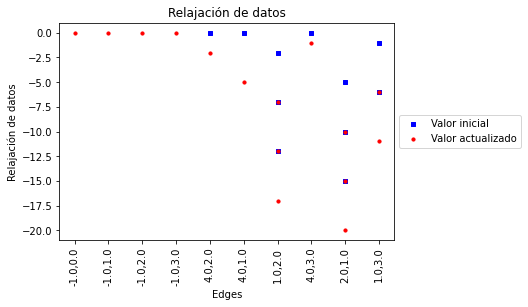

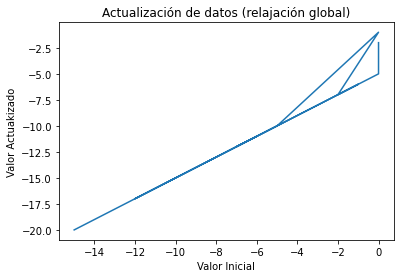

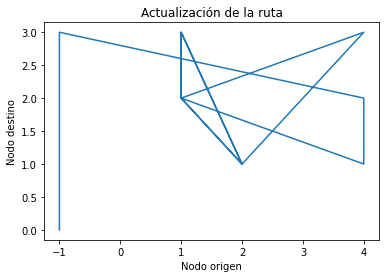

In [19]:
get_data_sol_seg_param(G1)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 7.  7.  7.  7.  7.  6.  5. -1.] 


Relajaciones, número de iteraciones:  20
Solución:  [5, 6, 5]
Relajaciones realizadas: 

 [[ 0.     inf -1.    0.  ]
 [ 0.     inf -1.    1.  ]
 [ 0.     inf -1.    2.  ]
 [ 0.     inf -1.    3.  ]
 [ 0.     inf -1.    4.  ]
 [ 0.     inf -1.    5.  ]
 [ 0.     inf -1.    6.  ]
 [-0.94  0.    7.    5.  ]
 [-0.08  0.    7.    6.  ]
 [-1.02 -0.94  6.    5.  ]
 [-0.16 -0.08  5.    6.  ]
 [-1.1  -1.02  6.    5.  ]
 [-0.24 -0.16  5.    6.  ]
 [-1.18 -1.1   6.    5.  ]
 [-0.32 -0.24  5.    6.  ]
 [-1.26 -1.18  6.    5.  ]
 [-0.4  -0.32  5.    6.  ]
 [-1.34 -1.26  6.    5.  ]
 [-0.48 -0.4   5.    6.  ]
 [-1.42 -1.34  6.    5.  ]] 




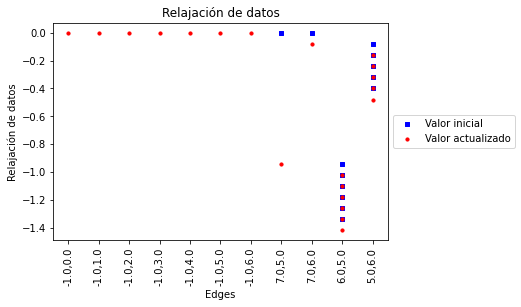

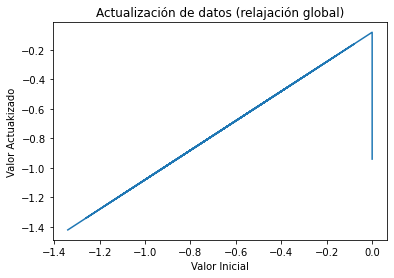

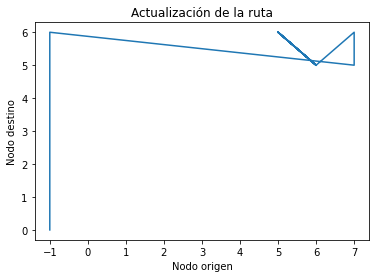

In [9]:
get_data_sol_seg_param(G2)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [10. 10.  3.  2. 10. 10. 10.  6.  7. 10. -1.] 


Relajaciones, número de iteraciones:  31
Solución:  [3, 2, 3]
Relajaciones realizadas: 

 [[  0.  inf  -1.   0.]
 [  0.  inf  -1.   1.]
 [  0.  inf  -1.   2.]
 [  0.  inf  -1.   3.]
 [  0.  inf  -1.   4.]
 [  0.  inf  -1.   5.]
 [  0.  inf  -1.   6.]
 [  0.  inf  -1.   7.]
 [  0.  inf  -1.   8.]
 [  0.  inf  -1.   9.]
 [-50.   0.  10.   7.]
 [-15.   0.  10.   2.]
 [-60.   0.  10.   8.]
 [ -5.   0.  10.   3.]
 [-20. -15.   3.   2.]
 [-10.  -5.   2.   3.]
 [-25. -20.   3.   2.]
 [-15. -10.   2.   3.]
 [-30. -25.   3.   2.]
 [-20. -15.   2.   3.]
 [-35. -30.   3.   2.]
 [-25. -20.   2.   3.]
 [-40. -35.   3.   2.]
 [-30. -25.   2.   3.]
 [-45. -40.   3.   2.]
 [-35. -30.   2.   3.]
 [-50. -45.   3.   2.]
 [-40. -35.   2.   3.]
 [-55. -50.   3.   2.]
 [-45. -40.   2.   3.]
 [-60. -55.   3.   2.]] 




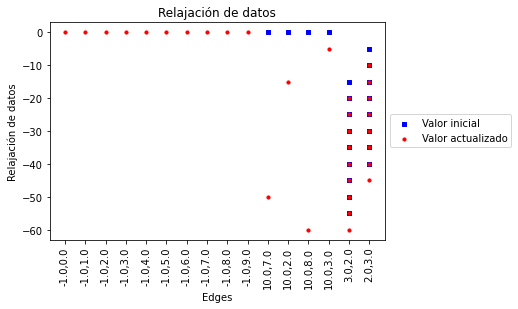

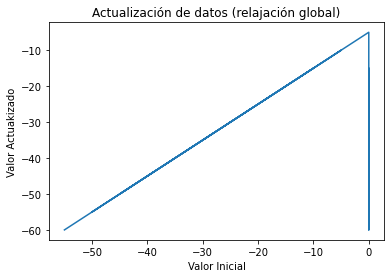

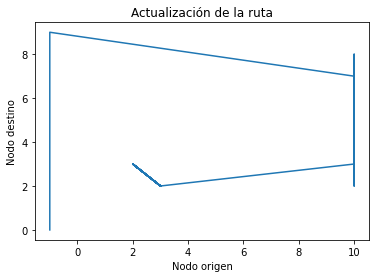

In [13]:
get_data_sol_seg_param(G3)

In [71]:
c,lv,lv2,p = bf_negative_cycle(G,5)

[-1. -1. -1. -1. -1.  6.  5. -1.]
16
[5, 6, 5]
[5.0]
[[ 0.86   inf -1.    6.  ]
 [-0.08  0.   -1.    5.  ]
 [ 0.78  0.86  5.    6.  ]
 [-0.16 -0.08  6.    5.  ]
 [ 0.7   0.78  5.    6.  ]
 [-0.24 -0.16  6.    5.  ]
 [ 0.62  0.7   5.    6.  ]
 [-0.32 -0.24  6.    5.  ]
 [ 0.54  0.62  5.    6.  ]
 [-0.4  -0.32  6.    5.  ]
 [ 0.46  0.54  5.    6.  ]
 [-0.48 -0.4   6.    5.  ]
 [ 0.38  0.46  5.    6.  ]
 [-0.56 -0.48  6.    5.  ]
 [ 0.3   0.38  5.    6.  ]
 [-0.64 -0.56  6.    5.  ]]


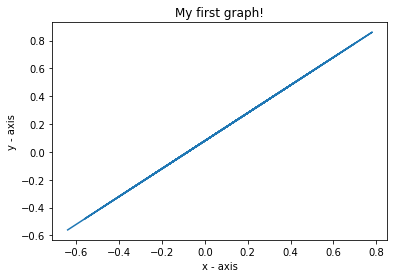

In [73]:
print(p)
print(len(lv))
print(c)
print(lv2)
arr = np.array(lv)
m = np.asmatrix(arr)
print(m)
x = np.array(m[:,0])
y = np.array(m[:,1])
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

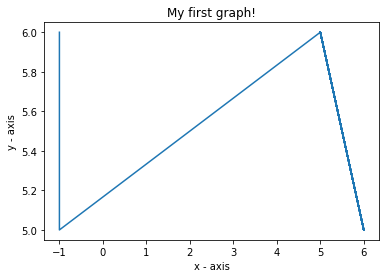

In [74]:
x = np.array(m[:,2])
y = np.array(m[:,3])
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

In [79]:
c,lv,lv2,p = bf_negative_cycle(G,6)

[-1. -1. -1. -1. -1.  6.  5. -1.]
15
[5, 6, 5]
[5.0]
[[-0.94   inf -1.    5.  ]
 [-0.08  0.   -1.    6.  ]
 [-1.02 -0.94  6.    5.  ]
 [-0.16 -0.08  5.    6.  ]
 [-1.1  -1.02  6.    5.  ]
 [-0.24 -0.16  5.    6.  ]
 [-1.18 -1.1   6.    5.  ]
 [-0.32 -0.24  5.    6.  ]
 [-1.26 -1.18  6.    5.  ]
 [-0.4  -0.32  5.    6.  ]
 [-1.34 -1.26  6.    5.  ]
 [-0.48 -0.4   5.    6.  ]
 [-1.42 -1.34  6.    5.  ]
 [-0.56 -0.48  5.    6.  ]
 [-1.5  -1.42  6.    5.  ]]


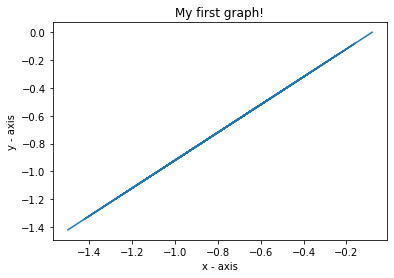

In [80]:
print(p)
print(len(lv))
print(c)
print(lv2)
arr = np.array(lv)
m = np.asmatrix(arr)
print(m)
x = np.array(m[:,0])
y = np.array(m[:,1])
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

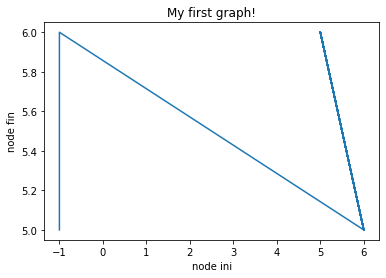

In [83]:
x = np.array(m[:,2])
y = np.array(m[:,3])
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('node ini')
# naming the y axis
plt.ylabel('node fin')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

In [84]:
c,lv,lv2,p = bf_negative_cycle(G,None,1)

[ 7.  7.  7.  7.  7.  6.  5. -1.]
21
[5, 6, 5]
[5.0]
[[ 0.06  1.   -1.    5.  ]
 [ 0.    1.   -1.    0.  ]
 [ 0.    1.   -1.    1.  ]
 [ 0.    1.   -1.    2.  ]
 [ 0.    1.   -1.    3.  ]
 [ 0.    1.   -1.    4.  ]
 [ 0.    0.06  6.    5.  ]
 [ 0.    1.   -1.    6.  ]
 [-0.94  0.    7.    5.  ]
 [-0.08  0.    7.    6.  ]
 [-1.02 -0.94  6.    5.  ]
 [-0.16 -0.08  5.    6.  ]
 [-1.1  -1.02  6.    5.  ]
 [-0.24 -0.16  5.    6.  ]
 [-1.18 -1.1   6.    5.  ]
 [-0.32 -0.24  5.    6.  ]
 [-1.26 -1.18  6.    5.  ]
 [-0.4  -0.32  5.    6.  ]
 [-1.34 -1.26  6.    5.  ]
 [-0.48 -0.4   5.    6.  ]
 [-1.42 -1.34  6.    5.  ]]


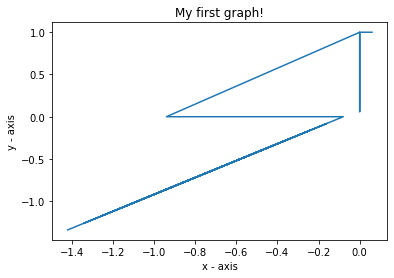

In [85]:
print(p)
print(len(lv))
print(c)
print(lv2)
arr = np.array(lv)
m = np.asmatrix(arr)
print(m)
x = np.array(m[:,0])
y = np.array(m[:,1])
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

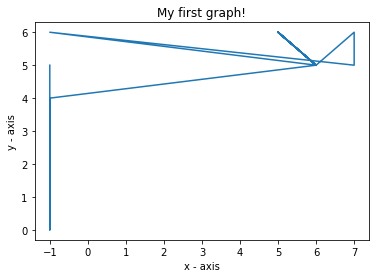

In [86]:
x = np.array(m[:,2])
y = np.array(m[:,3])
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

In [87]:
c,lv,lv2,p = bf_negative_cycle(G,None,10)

[ 7.  7.  7.  7.  7.  6.  5. -1.]
21
[5, 6, 5]
[5.0]
[[ 9.06 10.   -1.    5.  ]
 [ 0.   10.   -1.    0.  ]
 [ 0.   10.   -1.    1.  ]
 [ 0.   10.   -1.    2.  ]
 [ 0.   10.   -1.    3.  ]
 [ 0.   10.   -1.    4.  ]
 [ 0.    9.06  6.    5.  ]
 [ 0.   10.   -1.    6.  ]
 [-0.94  0.    7.    5.  ]
 [-0.08  0.    7.    6.  ]
 [-1.02 -0.94  6.    5.  ]
 [-0.16 -0.08  5.    6.  ]
 [-1.1  -1.02  6.    5.  ]
 [-0.24 -0.16  5.    6.  ]
 [-1.18 -1.1   6.    5.  ]
 [-0.32 -0.24  5.    6.  ]
 [-1.26 -1.18  6.    5.  ]
 [-0.4  -0.32  5.    6.  ]
 [-1.34 -1.26  6.    5.  ]
 [-0.48 -0.4   5.    6.  ]
 [-1.42 -1.34  6.    5.  ]]


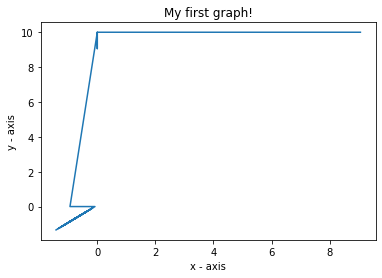

In [88]:
print(p)
print(len(lv))
print(c)
print(lv2)
arr = np.array(lv)
m = np.asmatrix(arr)
print(m)
x = np.array(m[:,0])
y = np.array(m[:,1])
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

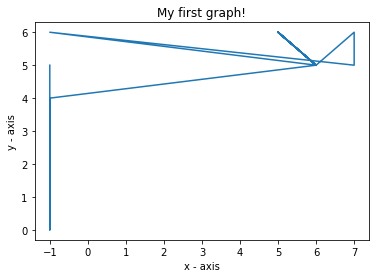

In [89]:
x = np.array(m[:,2])
y = np.array(m[:,3])
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()